In [1161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1162]:
train = pd.read_csv('House Prices - Advanced Regression Techniques/train.csv')

In [1163]:
test = pd.read_csv('House Prices - Advanced Regression Techniques/test.csv')

In [1164]:
df = pd.concat([train, test], ignore_index=True)

In [1165]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [1166]:
y_train = train['SalePrice']

In [1167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [1168]:
with open('House Prices - Advanced Regression Techniques/data_description.txt', 'r') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [1169]:
def percent_missing(df):
    percent_nan = df.isnull().sum() * 100 / len(df)
    return percent_nan[percent_nan > 0].sort_values()

In [1170]:
percent_nan = percent_missing(df)
percent_nan

Exterior2nd      0.034258
Exterior1st      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
Electrical       0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
GarageCars       0.034258
SaleType         0.034258
Functional       0.068517
BsmtFullBath     0.068517
Utilities        0.068517
BsmtHalfBath     0.068517
MSZoning         0.137033
MasVnrArea       0.787941
BsmtFinType1     2.706406
BsmtFinType2     2.740665
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
GarageType       5.378554
GarageFinish     5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
LotFrontage     16.649538
FireplaceQu     48.646797
SalePrice       49.982871
MasVnrType      60.500171
Fence           80.438506
Alley           93.216855
MiscFeature     96.402878
PoolQC          99.657417
dtype: float64

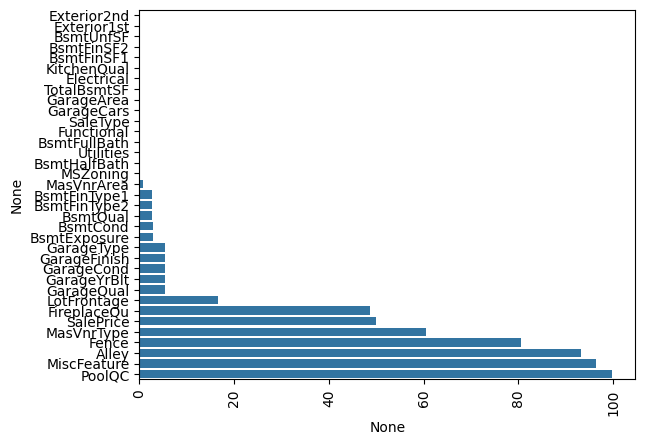

In [1171]:
sns.barplot(x=percent_nan, y=percent_nan.index)
plt.xticks(rotation=90);

In [1172]:
percent_nan[percent_nan < 1]

Exterior2nd     0.034258
Exterior1st     0.034258
BsmtUnfSF       0.034258
BsmtFinSF2      0.034258
BsmtFinSF1      0.034258
KitchenQual     0.034258
Electrical      0.034258
TotalBsmtSF     0.034258
GarageArea      0.034258
GarageCars      0.034258
SaleType        0.034258
Functional      0.068517
BsmtFullBath    0.068517
Utilities       0.068517
BsmtHalfBath    0.068517
MSZoning        0.137033
MasVnrArea      0.787941
dtype: float64

In [1173]:
df[df['Exterior1st'].isnull()].index == df[df['Exterior2nd'].isnull()].index

#only one row contains single missing value of Exterior1st column and Exterior2nd column

array([ True])

In [1174]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [1175]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [1176]:
print(df[df['BsmtFinSF1'].isnull()].index, df[df['BsmtFinSF2'].isnull()].index,
df[df['BsmtUnfSF'].isnull()].index, df[df['TotalBsmtSF'].isnull()].index)

#only one row contains single missing value of BsmtFinSF1 column, BsmtFinSF2 column,BsmtUnfSF column
#and TotalBsmtSF column
#that is row 2120
#that means that there is no basement in this house

Index([2120], dtype='int64') Index([2120], dtype='int64') Index([2120], dtype='int64') Index([2120], dtype='int64')


In [1177]:
df[df['BsmtFullBath'].isnull()].index == df[df['BsmtHalfBath'].isnull()].index

#same rows with missing values of BsmtFullBath column and BsmtHalfBath column

array([ True,  True])

In [1178]:
print('Number of FullBath in the houses', df['BsmtFullBath'].value_counts())
print('Number of HalfBath in the houses', df['BsmtHalfBath'].value_counts())

Number of FullBath in the houses BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64
Number of HalfBath in the houses BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64


In [1179]:
df[df['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1555,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,COD,Normal,NaN


In [1180]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [1181]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500.0


In [1182]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [1183]:
df[df['GarageArea'].isnull()].index, df[df['GarageCars'].isnull()].index
#No garage area means no garage cars

(Index([2576], dtype='int64'), Index([2576], dtype='int64'))

In [1184]:
df['SaleType'].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [1185]:
df[df['Functional'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2473,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml,NaN


In [1186]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [1187]:
df[df['Utilities'].isnull()]['Heating']

1915    GasA
1945    GasA
Name: Heating, dtype: object

In [1188]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [1189]:
df[df['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2250,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
2904,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


In [1190]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [1191]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0      1738
120.0      15
200.0      13
176.0      13
216.0      12
         ... 
355.0       1
405.0       1
327.0       1
257.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [1192]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [1193]:
df['MasVnrType'].isnull().sum()

np.int64(1766)

In [1194]:
for n in df[df['MasVnrArea'].isnull()].index:

    if n not in df[df['MasVnrType'].isnull()].index:
        print('oh')
        break
    print(f'{n} corresponds to MasVnrType {df.loc[n, "MasVnrType"]}')

#MasVnrType nan corresponds to MasVnrType 'None'
#every row from MasVnrArea[234, 529, ..., 2862] with missing value maps to MasVnrArea ('None') value or nan

234 corresponds to MasVnrType nan
529 corresponds to MasVnrType nan
650 corresponds to MasVnrType nan
936 corresponds to MasVnrType nan
973 corresponds to MasVnrType nan
977 corresponds to MasVnrType nan
1243 corresponds to MasVnrType nan
1278 corresponds to MasVnrType nan
1691 corresponds to MasVnrType nan
1706 corresponds to MasVnrType nan
1882 corresponds to MasVnrType nan
1992 corresponds to MasVnrType nan
2004 corresponds to MasVnrType nan
2041 corresponds to MasVnrType nan
2311 corresponds to MasVnrType nan
2325 corresponds to MasVnrType nan
2340 corresponds to MasVnrType nan
2349 corresponds to MasVnrType nan
2368 corresponds to MasVnrType nan
2592 corresponds to MasVnrType nan
2657 corresponds to MasVnrType nan
2686 corresponds to MasVnrType nan
2862 corresponds to MasVnrType nan


In [1195]:
df[df['MasVnrArea'] == 0]['MasVnrType'].value_counts()
#there are 1766 rows with MasVnrArea = 0
#there is mistake in the dataset, because with MasVnrArea = 0 there is 2 BrkFace and 1 Stone
#the values must have been 'None'(nan)

#or maybe on the areas, approximately 0 square feet of masonry veneer (2 brick faces and 1 of stone,) 
# was installed

MasVnrType
BrkFace    2
Stone      1
Name: count, dtype: int64

In [1196]:
values = {'TotalBsmtSF': 0, 'BsmtFullBath':0, 'BsmtHalfBath': 0, 'BsmtFinSF1': 0, 'BsmtFinSF2': 0,
            'Functional': 'Typ', 'Exterior1st': 'VinylSd',
            'Exterior2nd': 'MetalSd', 'BsmtUnfSF': 0, 'KitchenQual': 'TA', 'Electrical': 'SBrkr', 
            'GarageArea': 0, 'GarageCars': 0, 'SaleType': 'WD', 'Utilities': 'AllPub',
            'MSZoning': 'RL', 'MasVnrArea': 0}

In [1197]:
df = df.fillna(value=values)

In [1198]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Series([], dtype: float64)

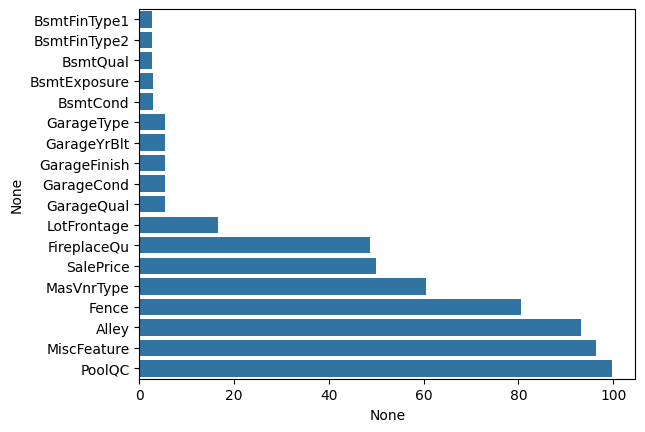

In [1199]:
sns.barplot(x=percent_nan, y=percent_nan.index);

In [1200]:
percent_nan[percent_nan<10]

BsmtFinType1    2.706406
BsmtFinType2    2.740665
BsmtQual        2.774923
BsmtExposure    2.809181
BsmtCond        2.809181
GarageType      5.378554
GarageYrBlt     5.447071
GarageFinish    5.447071
GarageCond      5.447071
GarageQual      5.447071
dtype: float64

In [1201]:
df['GarageType'].isnull().sum()
#there are 157 houses without garage, as NA is corresponding to no garage

np.int64(157)

In [1202]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

#as we use linear regression, we can use mean
#0 would be maleficent for the model

In [1203]:
bsmt_cols = ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
df[bsmt_cols] = df[bsmt_cols].fillna('NA')

In [1204]:
garage_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df[garage_str_cols] = df[garage_str_cols].fillna('NA')

In [1205]:
percent_nan = percent_missing(df)
percent_nan

LotFrontage    16.649538
FireplaceQu    48.646797
SalePrice      49.982871
MasVnrType     60.500171
Fence          80.438506
Alley          93.216855
MiscFeature    96.402878
PoolQC         99.657417
dtype: float64

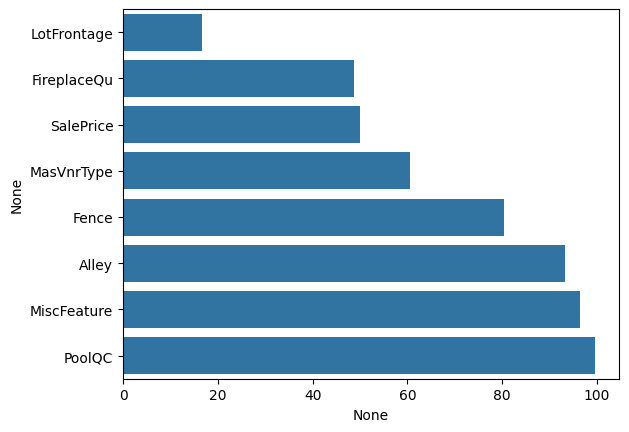

In [1206]:
sns.barplot(x=percent_nan, y=percent_nan.index);

In [1207]:
df['MasVnrType'] = df['MasVnrType'].fillna('none')

In [1208]:
df = df.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1)

In [1209]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('none')

In [1210]:
percent_nan = percent_missing(df)
percent_nan

LotFrontage    16.649538
SalePrice      49.982871
dtype: float64

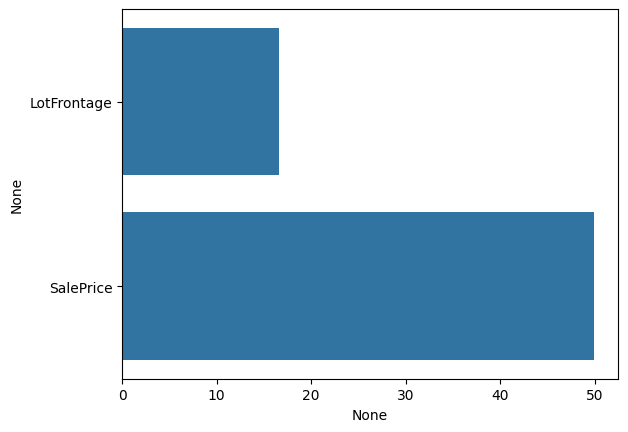

In [1211]:
sns.barplot(x=percent_nan, y=percent_nan.index);

In [1212]:
df.groupby('Neighborhood')['LotFrontage'].mean(numeric_only=True)
# Calculate the mean LotFrontage for each Neighborhood
# We will use these means to fill in the missing values in LotFrontage

#the code below fills in the missing values in LotFrontage

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
IDOTRR     62.241379
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: LotFrontage, dtype: float64

In [1213]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda lots: lots.fillna(lots.mean()))
# Fill missing values with the mean LotFrontage of the neighborhood
# The transform method returns a Series with the same index as the original DataFrame

In [1214]:
percent_nan = percent_missing(df)
percent_nan

SalePrice    49.982871
dtype: float64

In [1215]:
#mapping dictionaries for ordinal categorical variables with order inherent in the categories 
# (e.g. Ex > Gd > TA > Fa > Po)
bsmt_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
exterior_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

In [1216]:
df['BsmtCond'] = df['BsmtCond'].map(bsmt_dict)

In [1217]:
df['BsmtQual'] = df['BsmtQual'].map(bsmt_dict)

In [1218]:
df['ExterQual'] = df['ExterQual'].map(exterior_dict)

In [1219]:
df['ExterCond'] = df['ExterCond'].map(exterior_dict)

New Step


In [1220]:
#dummy_variable? - X['BsmtExposure']

In [1221]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
# Convert MSSubClass to string to treat it as a categorical variable

In [1222]:
df = df.drop('Id', axis=1)

In [1223]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64
MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
Street
Pave    2907
Grvl      12
Name: count, dtype: int64
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64
LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
Utilities
AllPub    2918
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    

In [ ]:
df.drop('Utilities', axis=1, inplace=True)
# Drop Utilities due to lack of variance

In [1225]:
df.drop('Street', axis=1, inplace=True)
# Drop Street due to lack of variance

REMOVING OUTLIERS FROM DF_TRAIN

In [1237]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
ExterCond        0.018899
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtCond         0.212607
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.348056
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.471062
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
BsmtQual         0.585207
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
ExterQual        0.682639
GrLivArea        0.708624
OverallQual 

In [1240]:
skewness = df.skew(numeric_only=True).sort_values(ascending=False)
skewness


MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
MasVnrArea        2.614936
OpenPorchSF       2.536417
SalePrice         1.882876
WoodDeckSF        1.843380
1stFlrSF          1.470360
LotFrontage       1.461180
BsmtFinSF1        1.425963
ExterCond         1.316590
GrLivArea         1.270010
TotalBsmtSF       1.157489
BsmtUnfSF         0.919812
2ndFlrSF          0.862118
ExterQual         0.786786
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.625153
OverallCond       0.570605
BedroomAbvGr      0.326492
GarageArea        0.239380
OverallQual       0.197212
MoSold            0.195985
FullBath          0.167692
YrSold            0.132467
GarageCars       -0.219694
GarageYrBlt      -0.392992
YearRemodAdd     -0.451252
Y

In [1242]:
df_num['PoolArea'].value_counts()

PoolArea
0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: count, dtype: int64

In [1243]:
df = df.drop('PoolArea', axis=1)
#Drop PoolArea due to lack of variance

In [1244]:
df.skew(numeric_only=True).sort_values(ascending=False)

MiscVal          21.958480
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
MasVnrArea        2.614936
OpenPorchSF       2.536417
SalePrice         1.882876
WoodDeckSF        1.843380
1stFlrSF          1.470360
LotFrontage       1.461180
BsmtFinSF1        1.425963
ExterCond         1.316590
GrLivArea         1.270010
TotalBsmtSF       1.157489
BsmtUnfSF         0.919812
2ndFlrSF          0.862118
ExterQual         0.786786
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.625153
OverallCond       0.570605
BedroomAbvGr      0.326492
GarageArea        0.239380
OverallQual       0.197212
MoSold            0.195985
FullBath          0.167692
YrSold            0.132467
GarageCars       -0.219694
GarageYrBlt      -0.392992
YearRemodAdd     -0.451252
YearBuilt        -0.600114
B

<Axes: xlabel='LotArea', ylabel='Count'>

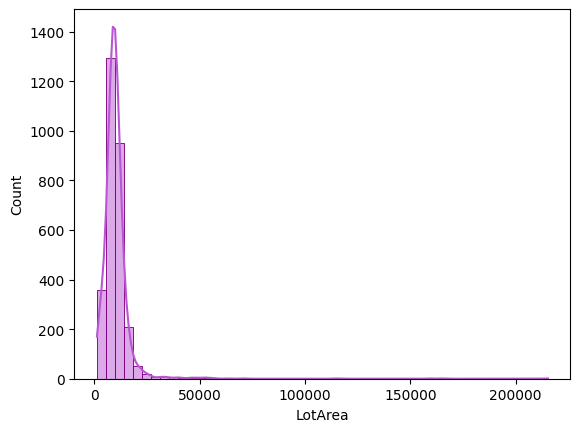

In [1245]:
sns.histplot(df['LotArea'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1246]:
df['LotArea'] = np.log1p(df['LotArea'])

<Axes: xlabel='LotArea', ylabel='Count'>

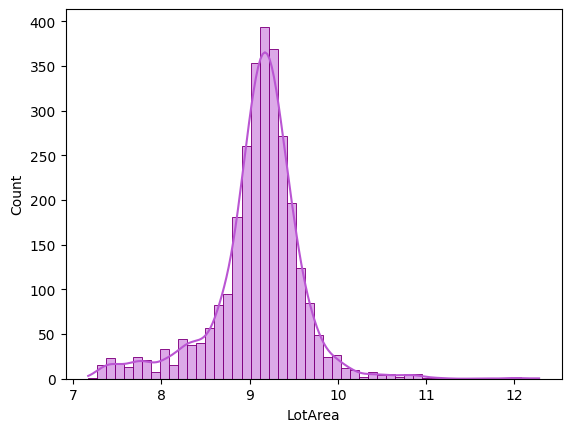

In [1247]:
sns.histplot(df['LotArea'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

<Axes: xlabel='MiscVal', ylabel='Count'>

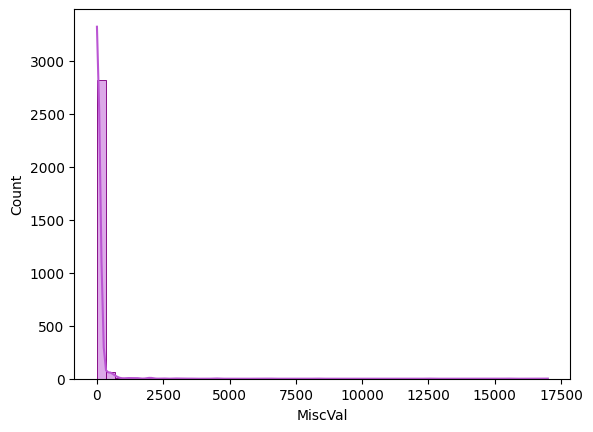

In [1248]:
sns.histplot(df['MiscVal'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1249]:
df['MiscVal'].value_counts()

MiscVal
0        2816
400        18
500        13
450         9
600         8
700         7
2000        7
1500        3
650         3
1200        3
4500        2
480         2
2500        2
3000        2
350         1
54          1
560         1
620         1
1300        1
800         1
3500        1
15500       1
12500       1
1150        1
8300        1
1400        1
490         1
900         1
80          1
300         1
6500        1
750         1
1000        1
17000       1
1512        1
455         1
460         1
420         1
Name: count, dtype: int64

In [1250]:
#Drop MiscVal due to lack of variance
df = df.drop('MiscVal', axis=1)

<Axes: xlabel='LowQualFinSF', ylabel='Count'>

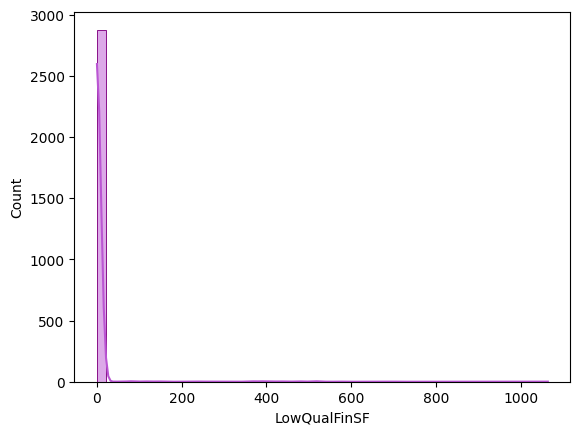

In [1251]:
sns.histplot(df['LowQualFinSF'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1252]:
df['LowQualFinSF'].value_counts()

LowQualFinSF
0       2879
80         4
205        2
360        2
234        1
513        1
144        1
528        1
371        1
390        1
420        1
572        1
473        1
156        1
515        1
53         1
232        1
481        1
120        1
392        1
514        1
397        1
479        1
384        1
362        1
1064       1
431        1
436        1
259        1
312        1
108        1
697        1
512        1
114        1
140        1
450        1
Name: count, dtype: int64

In [1253]:
df = df.drop('LowQualFinSF', axis=1)

<Axes: xlabel='3SsnPorch', ylabel='Count'>

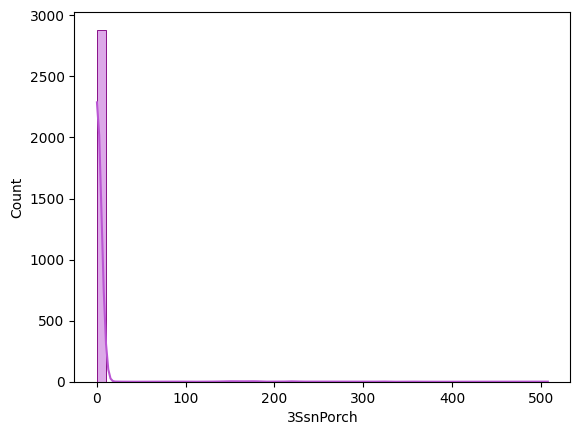

In [1254]:
sns.histplot(df['3SsnPorch'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1255]:
df['3SsnPorch'].value_counts()

3SsnPorch
0      2882
168       3
153       3
144       2
180       2
216       2
407       1
140       1
508       1
245       1
238       1
196       1
182       1
130       1
320       1
23        1
162       1
96        1
290       1
304       1
224       1
255       1
225       1
360       1
150       1
174       1
120       1
219       1
176       1
86        1
323       1
Name: count, dtype: int64

In [1256]:
#Drop 3SsnPorch due to lack of variance
df = df.drop('3SsnPorch', axis=1)

<Axes: xlabel='KitchenAbvGr', ylabel='Count'>

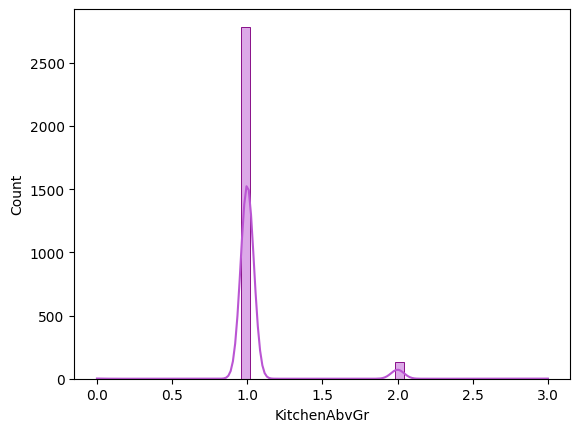

In [1257]:
sns.histplot(df['KitchenAbvGr'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1258]:
df['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    2785
2     129
0       3
3       2
Name: count, dtype: int64

<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

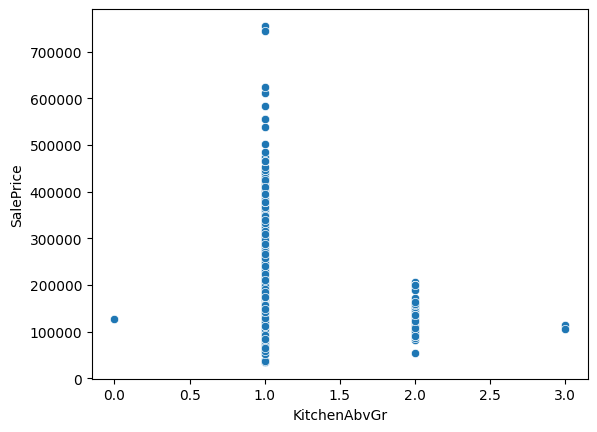

In [1259]:
sns.scatterplot(x=df['KitchenAbvGr'], y=df['SalePrice'])

In [1260]:
#Drop KitchenAbvGr due to lack of variance
#The relationship between KitchenAbvGr and SalePrice is weak
df = df.drop('KitchenAbvGr', axis=1)

In [1261]:
skewness = df.skew(numeric_only=True).sort_values(ascending=False)
skewness

BsmtFinSF2       4.148275
EnclosedPorch    4.005950
ScreenPorch      3.948723
BsmtHalfBath     3.933616
MasVnrArea       2.614936
OpenPorchSF      2.536417
SalePrice        1.882876
WoodDeckSF       1.843380
1stFlrSF         1.470360
LotFrontage      1.461180
BsmtFinSF1       1.425963
ExterCond        1.316590
GrLivArea        1.270010
TotalBsmtSF      1.157489
BsmtUnfSF        0.919812
2ndFlrSF         0.862118
ExterQual        0.786786
TotRmsAbvGrd     0.758757
Fireplaces       0.733872
HalfBath         0.694924
BsmtFullBath     0.625153
OverallCond      0.570605
BedroomAbvGr     0.326492
GarageArea       0.239380
OverallQual      0.197212
MoSold           0.195985
FullBath         0.167692
YrSold           0.132467
GarageCars      -0.219694
GarageYrBlt     -0.392992
YearRemodAdd    -0.451252
LotArea         -0.505010
YearBuilt       -0.600114
BsmtQual        -1.269195
BsmtCond        -3.605964
dtype: float64

<Axes: xlabel='BsmtFinSF2', ylabel='Count'>

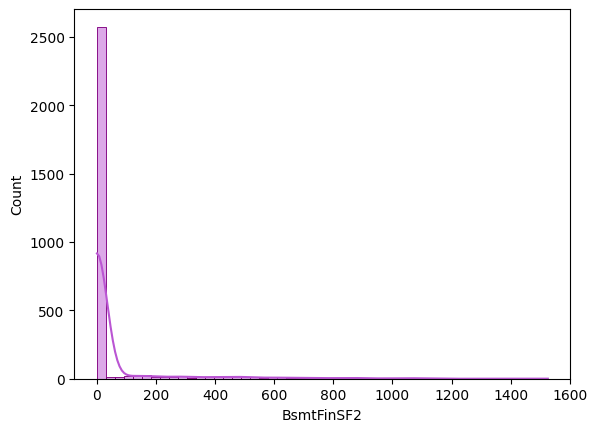

In [1262]:
sns.histplot(df['BsmtFinSF2'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1263]:
df['BsmtFinSF2'].value_counts()

BsmtFinSF2
0.0       2572
180.0        5
294.0        5
435.0        3
144.0        3
          ... 
869.0        1
150.0        1
215.0        1
28.0         1
1080.0       1
Name: count, Length: 272, dtype: int64

In [1264]:
#Drop BsmtFinSF2 due to lack of variance
#most of the values are 0
df = df.drop('BsmtFinSF2', axis=1)

In [1265]:
df['EnclosedPorch'].unique()

array([   0,  272,  228,  205,  176,   87,  172,  102,   37,  144,   64,
        114,  202,  128,  156,   44,   77,  192,  140,  180,  183,   39,
        184,   40,  552,   30,  126,   96,   60,  150,  120,  112,  252,
         52,  224,  234,  244,  268,  137,   24,  108,  294,  177,  218,
        242,   91,  160,  130,  169,  105,   34,  248,  236,   32,   80,
        115,  291,  116,  158,  210,   36,  200,   84,  148,  136,  240,
         54,  100,  189,  293,  164,  216,  239,   67,   90,   56,  129,
         98,  143,   70,  386,  154,  185,  134,  196,  264,  275,  230,
        254,   68,  194,  318,   48,   94,  138,  226,  174,   19,  170,
        220,  214,  280,  190,  330,  208,  145,  259,   81,   42,  123,
        162,  286,  168,   20,  301,  198,  221,  212,   50,   99,  186,
        113,  135,  334,  246,   18,   41,   35,  364,   45,   86,  265,
        222,  209,  260,  203,  432,   25,  238,   51,  213,  288,  211,
         55,   57,   78,   72,  368,  165,   92,   

In [1266]:
df = df.drop('EnclosedPorch', axis=1)

In [1267]:
df['ScreenPorch'].value_counts()

ScreenPorch
0      2663
144      13
192      11
168      10
120       9
       ... 
270       1
162       1
348       1
113       1
104       1
Name: count, Length: 121, dtype: int64

In [1268]:
df = df.drop('ScreenPorch', axis=1)

In [1269]:
df['BsmtHalfBath'].value_counts()

BsmtHalfBath
0.0    2744
1.0     171
2.0       4
Name: count, dtype: int64

In [1270]:
df_BsmtHalfBath = pd.get_dummies(df['BsmtHalfBath'], prefix='BsmtHalfBath', drop_first=True, dtype=int)

In [1271]:
df = pd.concat([df, df_BsmtHalfBath], axis=1)

In [1272]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0      1761
120.0      15
200.0      13
176.0      13
216.0      12
         ... 
355.0       1
405.0       1
327.0       1
257.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [1273]:
df['MasVnrArea'] = np.log1p(df['MasVnrArea'])

<Axes: xlabel='MasVnrArea', ylabel='Count'>

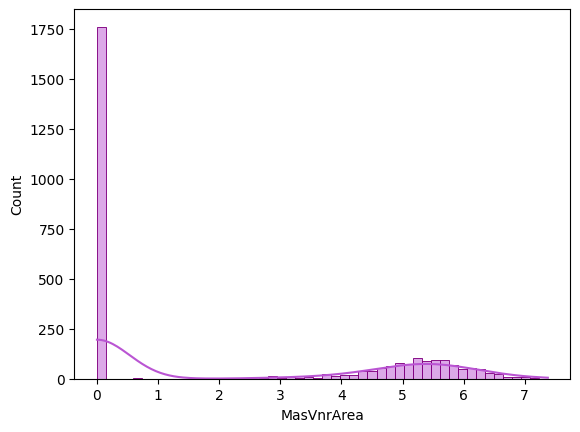

In [1274]:
sns.histplot(df['MasVnrArea'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

<Axes: xlabel='OpenPorchSF', ylabel='Count'>

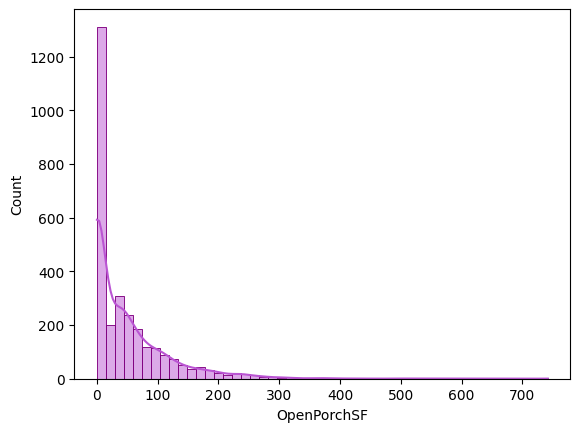

In [1275]:
sns.histplot(df['OpenPorchSF'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1276]:
df['OpenPorchSF'] = np.log1p(df['OpenPorchSF'])

<Axes: xlabel='OpenPorchSF', ylabel='Count'>

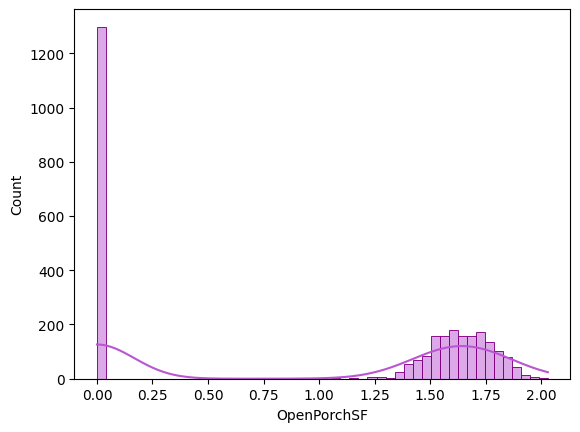

In [1277]:
sns.histplot(np.log1p(df['OpenPorchSF']), bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1278]:
df['WoodDeckSF'] = np.log1p(df['WoodDeckSF'])

<Axes: xlabel='WoodDeckSF', ylabel='Count'>

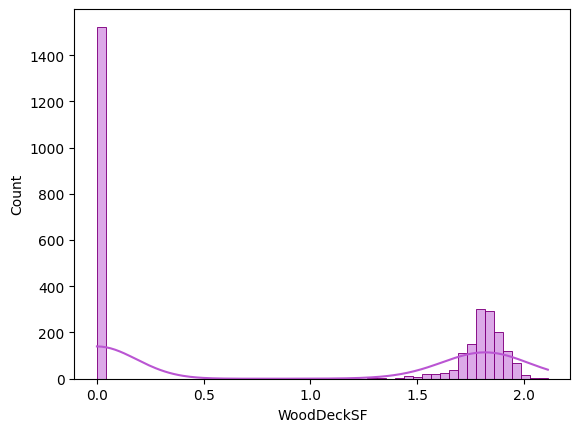

In [1279]:
sns.histplot(np.log1p(df['WoodDeckSF']), bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1280]:
df['1stFlrSF'].value_counts()

1stFlrSF
864     46
1040    28
912     19
816     18
960     18
        ..
1286     1
1921     1
665      1
834      1
1017     1
Name: count, Length: 1083, dtype: int64

In [1281]:
df['1stFlrSF'] = np.log1p(df['1stFlrSF'])

<Axes: xlabel='1stFlrSF', ylabel='Count'>

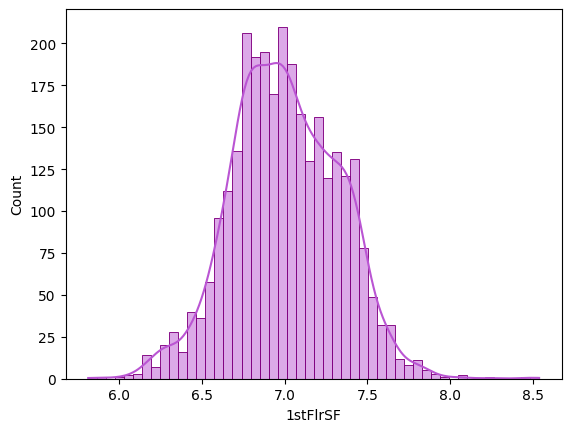

In [1282]:
sns.histplot(df['1stFlrSF'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

<Axes: xlabel='BsmtFinSF1', ylabel='Count'>

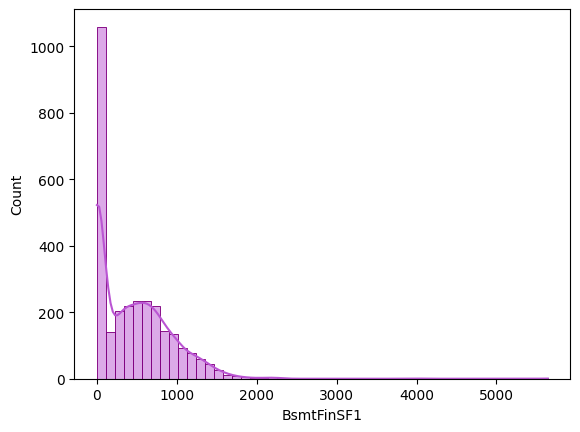

In [1283]:
sns.histplot(df['BsmtFinSF1'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1284]:
df['BsmtFinSF1'] = np.log1p(df['BsmtFinSF1'])

<Axes: xlabel='BsmtFinSF1', ylabel='Count'>

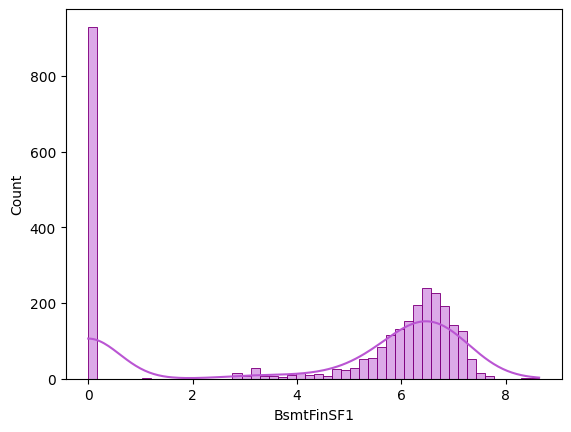

In [1285]:
sns.histplot(df['BsmtFinSF1'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1286]:
skewness = df.skew(numeric_only=True).sort_values(ascending=False)
skewness

BsmtHalfBath_2.0    26.972189
BsmtHalfBath         3.933616
BsmtHalfBath_1.0     3.761242
SalePrice            1.882876
LotFrontage          1.461180
ExterCond            1.316590
GrLivArea            1.270010
TotalBsmtSF          1.157489
BsmtUnfSF            0.919812
2ndFlrSF             0.862118
ExterQual            0.786786
TotRmsAbvGrd         0.758757
Fireplaces           0.733872
HalfBath             0.694924
BsmtFullBath         0.625153
OverallCond          0.570605
MasVnrArea           0.537294
BedroomAbvGr         0.326492
GarageArea           0.239380
OverallQual          0.197212
MoSold               0.195985
FullBath             0.167692
WoodDeckSF           0.158114
YrSold               0.132467
1stFlrSF             0.064861
OpenPorchSF         -0.041819
GarageCars          -0.219694
GarageYrBlt         -0.392992
YearRemodAdd        -0.451252
LotArea             -0.505010
YearBuilt           -0.600114
BsmtFinSF1          -0.616949
BsmtQual            -1.269195
BsmtCond  

In [1287]:
#df['ExterCond'] is a categorical variable with 5 categories 

<Axes: xlabel='GrLivArea', ylabel='Count'>

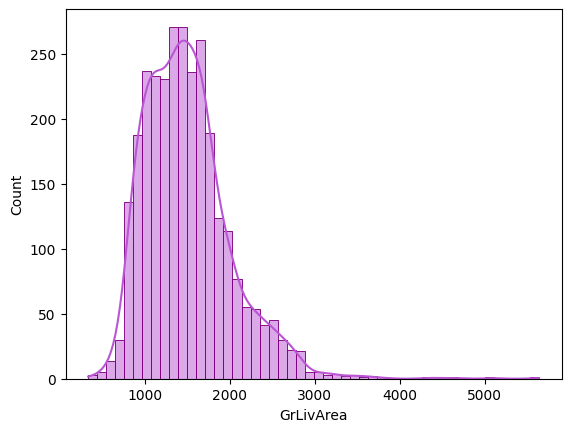

In [1288]:
sns.histplot(df['GrLivArea'], bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1289]:
df['GrLivArea'] = np.log1p(df['GrLivArea'])

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

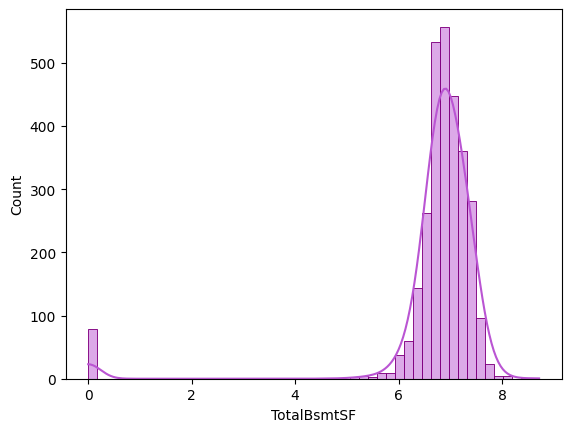

In [1290]:
sns.histplot(np.log1p(df['TotalBsmtSF']), bins=50, kde=True, color='mediumorchid', edgecolor='purple')

In [1291]:
np.log1p(df['TotalBsmtSF']).skew()

np.float64(-4.958842187588636)

In [1293]:
sorted(df['TotalBsmtSF'], reverse=True)

[6110.0,
 5095.0,
 3206.0,
 3200.0,
 3138.0,
 3094.0,
 2846.0,
 2660.0,
 2633.0,
 2630.0,
 2552.0,
 2535.0,
 2524.0,
 2492.0,
 2461.0,
 2458.0,
 2452.0,
 2444.0,
 2418.0,
 2396.0,
 2392.0,
 2330.0,
 2320.0,
 2271.0,
 2223.0,
 2220.0,
 2217.0,
 2216.0,
 2208.0,
 2200.0,
 2190.0,
 2171.0,
 2158.0,
 2153.0,
 2140.0,
 2136.0,
 2136.0,
 2121.0,
 2110.0,
 2109.0,
 2108.0,
 2078.0,
 2077.0,
 2076.0,
 2062.0,
 2048.0,
 2046.0,
 2042.0,
 2036.0,
 2035.0,
 2033.0,
 2024.0,
 2020.0,
 2014.0,
 2006.0,
 2002.0,
 2002.0,
 2000.0,
 1994.0,
 1992.0,
 1986.0,
 1982.0,
 1980.0,
 1978.0,
 1978.0,
 1976.0,
 1967.0,
 1966.0,
 1964.0,
 1958.0,
 1952.0,
 1950.0,
 1949.0,
 1947.0,
 1935.0,
 1934.0,
 1932.0,
 1930.0,
 1930.0,
 1926.0,
 1922.0,
 1922.0,
 1921.0,
 1910.0,
 1907.0,
 1905.0,
 1902.0,
 1898.0,
 1896.0,
 1884.0,
 1884.0,
 1884.0,
 1869.0,
 1868.0,
 1868.0,
 1866.0,
 1865.0,
 1860.0,
 1858.0,
 1856.0,
 1851.0,
 1850.0,
 1850.0,
 1848.0,
 1848.0,
 1845.0,
 1844.0,
 1844.0,
 1844.0,
 1842.0,
 1840.0,
 

<Axes: xlabel='TotalBsmtSF'>

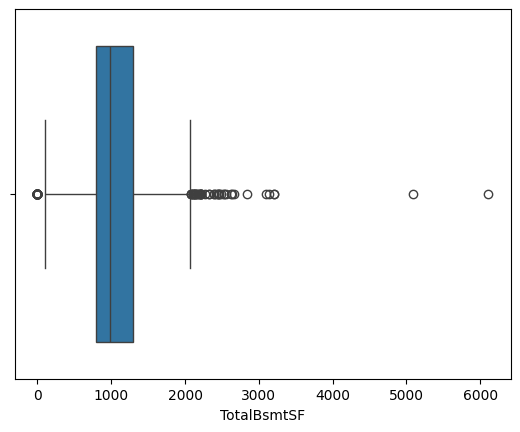

In [1294]:
sns.boxplot(x=df['TotalBsmtSF'])
# 6110.0 and 5095.0 are the most extreme outliers

In [ ]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].replace([6110, 5095], df['TotalBsmtSF'].mean())

#removing the outliers by replacing them with the mean value in order to avoid skewness

<Axes: xlabel='TotalBsmtSF'>

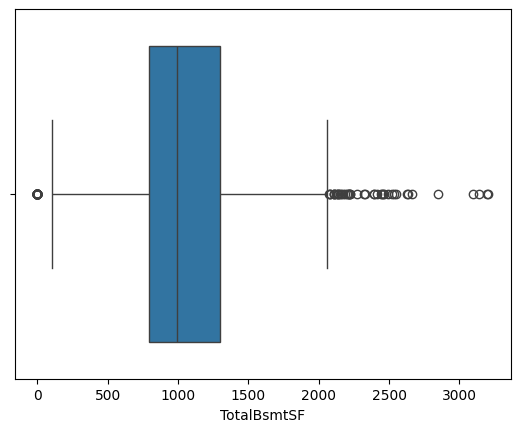

In [1331]:
sns.boxplot(x=df['TotalBsmtSF'])

In [1316]:
df_qual = pd.get_dummies(df['BsmtQual'], drop_first=True, dtype=int, prefix='BsmtQual')
df_qual.head()

,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtQual_5
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [ ]:
#concatenating the dummy variables

df = pd.concat([df, df_qual], axis=1)

In [ ]:
#dropping the original column BsmtQual 
#we don't need it anymore

df = df.drop('BsmtQual', axis=1)

In [1301]:
df['BsmtCond'].value_counts()

BsmtCond
3    2606
4     122
2     104
0      82
1       5
Name: count, dtype: int64

In [ ]:
#creating dummy variables for BsmtCond 

df_bsmt = pd.get_dummies(df['BsmtCond'], drop_first=True, dtype=int, prefix='BsmtCond')
df_bsmt.head()

,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [ ]:
#concatenating the dummy variables

df = pd.concat([df, df_bsmt], axis=1)

In [ ]:
#dropping the original column BsmtCond 
#we don't need it anymore

df = df.drop('BsmtCond', axis=1)

In [1325]:
df.skew(numeric_only=True).sort_values(ascending=False)

#BsmtHalfBath_2.0, BsmtCond_1, BsmtQual_2, BsmtCond_2, BsmtCond4 are very skewed
#but they are dummies, so we can ignore them

BsmtHalfBath_2.0    26.972189
BsmtCond_1          24.112221
BsmtQual_2           5.498419
BsmtCond_2           5.012991
BsmtCond_4           4.581639
BsmtHalfBath         3.933616
BsmtHalfBath_1.0     3.761242
BsmtQual_5           2.901648
SalePrice            1.882876
LotFrontage          1.461180
ExterCond            1.316590
BsmtUnfSF            0.919812
2ndFlrSF             0.862118
ExterQual            0.786786
TotRmsAbvGrd         0.758757
Fireplaces           0.733872
HalfBath             0.694924
BsmtFullBath         0.625153
OverallCond          0.570605
MasVnrArea           0.537294
TotalBsmtSF          0.444158
BsmtQual_4           0.348618
BedroomAbvGr         0.326492
BsmtQual_3           0.243777
GarageArea           0.239380
OverallQual          0.197212
MoSold               0.195985
FullBath             0.167692
WoodDeckSF           0.158114
YrSold               0.132467
1stFlrSF             0.064861
GrLivArea            0.013194
OpenPorchSF         -0.041819
GarageCars

Dummy Variables

In [1345]:
df_obj = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object'])
df_obj.tail()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
2914,160,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,...,TA,Typ,none,NA,NA,NA,NA,Y,WD,Normal
2915,160,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,...,TA,Typ,none,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,20,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,85,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,TA,Typ,none,NA,NA,NA,NA,Y,WD,Normal
2918,60,RL,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [ ]:
# Convert categorical variables to dummy variables
df_obj = pd.get_dummies(df_obj, drop_first=True, dtype=int)
df_obj.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [1351]:
final_df = pd.concat([df_num, df_obj], axis=1)
final_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,9.042040,7,5,2003,2003,5.283204,4,3,6.561031,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9.169623,6,8,1976,1976,0.000000,3,3,6.886532,...,0,0,0,0,1,0,0,0,1,0
2,68.0,9.328212,7,5,2001,2002,5.093750,4,3,6.188264,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9.164401,7,5,1915,1970,0.000000,3,3,5.379897,...,0,0,0,0,1,0,0,0,0,0
4,84.0,9.565284,8,5,2000,2000,5.860786,4,3,6.486161,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,7.568896,4,7,1970,1970,0.000000,3,3,0.000000,...,0,0,0,0,1,0,0,0,1,0
2915,21.0,7.546974,4,5,1970,1970,0.000000,3,3,5.533389,...,0,0,0,0,1,0,0,0,0,0
2916,160.0,9.903538,5,7,1960,1996,0.000000,3,3,7.110696,...,0,0,0,0,1,0,0,0,0,0
2917,62.0,9.253591,5,5,1992,1992,0.000000,3,3,5.823046,...,0,0,0,0,1,0,0,0,1,0


SPLITTING PREPROCESSED DATAFRAME INTO X, X_final_test and y

In [1443]:
y = final_df['SalePrice'][:1460]

In [1444]:
X = final_df.drop('SalePrice', axis=1)[:1460]
X_final_test = final_df.drop('SalePrice', axis=1)[1460:]

SPLITTING df_train

In [1445]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=101)
# Split data into train and validation sets

In [1446]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [1447]:
from sklearn.linear_model import ElasticNet

ElasticNet_model = ElasticNet()

In [1448]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'alpha': [.0001, .001, .01, .1, 0, 1, 5, 10, 20, 50, 100],
    'l1_ratio': [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
}

grid_model = GridSearchCV(param_grid=param_grid, estimator=ElasticNet_model, scoring='neg_mean_squared_error', cv=10, verbose=2)

In [1450]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 121 candidates, totalling 1210 fits
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.151e+11, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+11, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+11, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.032e+11, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordi

[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.158e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.158e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.148e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.147e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.8; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.147e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+11, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordi

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+11, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+11, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.013e+11, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.686e+11, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.180e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.049e+11, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.937e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.011e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.199e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.178e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.843e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.180e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.682e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.045e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.007e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.043e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.193e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.4; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.158e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.834e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.676e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.038e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.156e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.6; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.998e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.185e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.8; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.027e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.989e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.154e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+11, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.078e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.013e+11, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.328e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.818e+11, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.335e+11, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+11, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordi

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.758e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.735e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.207e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.704e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.011e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.949e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.960e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.090e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.198e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.967e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.711e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.211e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.034e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.118e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.813e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.688e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.015e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.203e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.691e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.200e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.147e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+11, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.016e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.145e+11, tolerance: 6.036e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+11, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.941e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+11, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.130e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.000e+11, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.770e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+11, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.020e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.500e+11, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e+11, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+11, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+09, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.486e+08, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.545e+08, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.371e+09, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+09, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+11, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.481e+11, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e+11, tolerance: 5.724e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.274e+11, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.907e+11, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e+11, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DA

[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.148e+11, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+11, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+11, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+11, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.148e+11, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+11, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+11, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.026e+11, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.653e+11, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.136e+11, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.675e+11, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.017e+11, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.790e+11, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.939e+11, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.909e+10, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.040e+10, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.297e+10, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.552e+10, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.011e+10, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.507e+10, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+10, tolerance: 5.915e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+12, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordi

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+12, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+12, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+12, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+12, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+12, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+12, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+12, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.799e+09, tolerance: 5.950e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+08, tolerance: 5.523e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.052e+09, tolerance: 5.689e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+10, tolerance: 5.739e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.272e+09, tolerance: 5.616e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.469e+09, tolerance: 5.939e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+12, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+12, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+12, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+12, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.460e+12, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+12, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+12, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.142e+08, tolerance: 5.911e+08
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.961e+12, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+12, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.997e+12, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+12, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+12, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.974e+12, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+12, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.422e+12, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.256e+12, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.332e+12, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.353e+12, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+12, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.283e+12, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.416e+12, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.411e+12, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.660e+12, tolerance: 5.950e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.474e+12, tolerance: 5.523e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.702e+12, tolerance: 6.036e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+12, tolerance: 5.689e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+12, tolerance: 5.739e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.559e+12, tolerance: 5.724e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.509e+12, tolerance: 5.616e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.661e+12, tolerance: 5.939e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+12, tolerance: 5.911e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.646e+12, tolerance: 5.915e+08
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.0001, 0.001, ...], 'l1_ratio': [0, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [1451]:
best_model = grid_model.best_estimator_

In [1452]:
y_pred = best_model.predict(X_valid)

In [1453]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

print(mean_squared_error(y_valid, y_pred))

print(mean_absolute_error(y_valid, y_pred))

print(root_mean_squared_error(y_valid, y_pred))

print(y.mean())

1023587877.648809
17842.44175638686
31993.559940225612
180921.19589041095


WITH log-transformed y

In [1454]:
# Using log transformation to normalize the data 
# log1p is the natural logarithm plus 1
# used as it is more robust to zero values than log [ln(0) is undefined or -infinity]
y_log = np.log1p(y)

y_train_log, y_valid_log = np.log1p(y_train), np.log1p(y_valid)

SalePrice skewness(raw): 1.8828757597682129


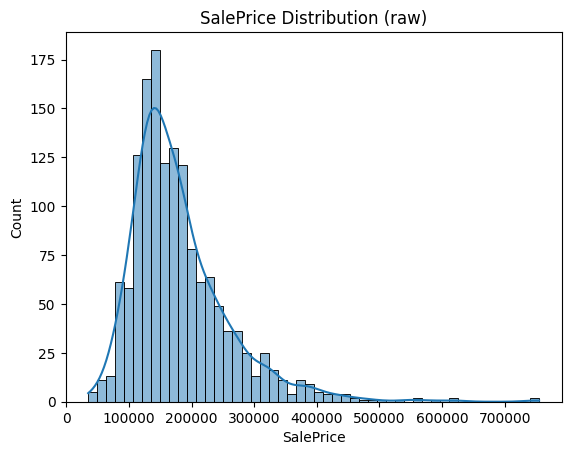

In [1455]:
sns.histplot(y, bins=50, kde=True)
plt.title('SalePrice Distribution (raw)')

print(F"SalePrice skewness(raw): {df['SalePrice'].skew()}")

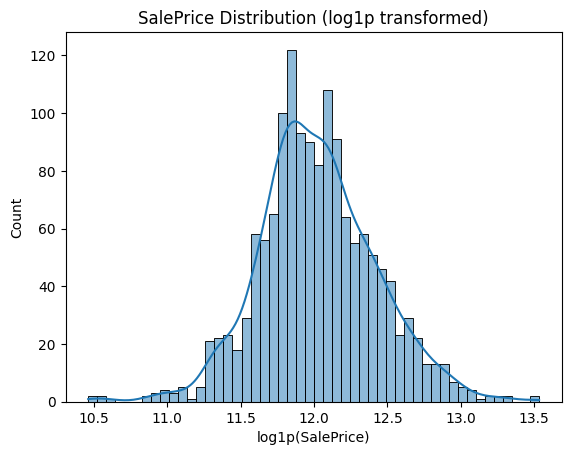

In [1456]:
#already Log-transformed target

sns.histplot(y_log, bins=50, kde=True)

plt.title('SalePrice Distribution (log1p transformed)')
plt.xlabel('log1p(SalePrice)');

In [1437]:
grid_model.fit(X_train, y_train_log)

Fitting 10 folds for each of 121 candidates, totalling 1210 fits
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.887e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.688e+00, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.572e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.409e+00, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+00, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.839e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.866e-02, tolerance: 1.460e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e-01, tolerance: 1.378e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e-02, tolerance: 1.436e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.783e-02, tolerance: 1.445e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.544e-01, tolerance: 1.431e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.015e-02, tolerance: 1.441e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.788e-02, tolerance: 1.460e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e-01, tolerance: 1.431e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.306e-02, tolerance: 1.460e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e-02, tolerance: 1.431e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e-02, tolerance: 1.460e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e-02, tolerance: 1.431e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.918e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.718e+00, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.604e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+00, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.474e+00, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.400e+00, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.152e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.951e+00, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.841e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.666e+00, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.717e+00, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.628e+00, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.433e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.213e+00, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.275e+00, tolerance: 1.460e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.097e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.186e+00, tolerance: 1.436e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+00, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.299e+00, tolerance: 1.431e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.894e+00, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.437e+00, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.437e+00, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+00, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+00, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.684e+00, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+00, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+00, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+00, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e+00, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.609e+00, tolerance: 1.460e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.437e+00, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e+00, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+00, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.745e+00, tolerance: 1.431e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.684e+00, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+00, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.745e+00, tolerance: 1.431e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+01, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+01, tolerance: 1.460e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+01, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+01, tolerance: 1.436e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+01, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+01, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+01, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+01, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+01, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.477e+01, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.380e+01, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.481e+01, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+01, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+01, tolerance: 1.431e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.447e+01, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.459e+01, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+01, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.423e+01, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.291e+01, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.389e+01, tolerance: 1.436e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.426e+01, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+01, tolerance: 1.431e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e+01, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.522e+01, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.381e+01, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.468e+01, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.304e+01, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.483e+01, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.488e+01, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.454e+01, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.2; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.2; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.2; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.2; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.2; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.771e+01, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.577e+01, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.674e+01, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.479e+01, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.720e+01, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.709e+01, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.696e+01, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.422e+01, tolerance: 1.459e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.197e+01, tolerance: 1.404e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.296e+01, tolerance: 1.424e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.086e+01, tolerance: 1.378e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+01, tolerance: 1.445e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.344e+01, tolerance: 1.438e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.343e+01, tolerance: 1.441e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.0001, 0.001, ...], 'l1_ratio': [0, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [1438]:
best_model = grid_model.best_estimator_

In [1440]:
y_pred = best_model.predict(X_valid)

In [1441]:
print('MSE: ', mean_squared_error(y_valid_log, y_pred))

print('MAE: ', mean_absolute_error(y_valid_log, y_pred))

print('RMSE: ', root_mean_squared_error(y_valid_log, y_pred))

print('Mean: ', y_log.mean())

MSE:  0.019914312603960607
MAE:  0.08626002107829255
RMSE:  0.14111808035811926
Mean:  12.024057394918406


THE FINAL STEPS


In [1457]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

# Transform the data using the scaler 
# both 
X = scaler.transform(X)

X_final_test = scaler.transform(X_final_test)

In [1466]:
grid_model.fit(X, y_log)

Fitting 10 folds for each of 121 candidates, totalling 1210 fits
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.512e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.778e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.541e+00, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.701e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.766e+00, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.0001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+00, tolerance: 2.119e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.361e-01, tolerance: 2.100e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.950e+00, tolerance: 2.065e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+00, tolerance: 2.063e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e+00, tolerance: 2.027e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e+00, tolerance: 2.139e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.563e+00, tolerance: 2.123e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+00, tolerance: 2.118e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+00, tolerance: 2.091e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.234e-01, tolerance: 2.119e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.369e-02, tolerance: 2.100e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.108e-01, tolerance: 2.065e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.1s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.504e-01, tolerance: 2.063e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.044e-01, tolerance: 2.027e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.388e-01, tolerance: 2.106e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.176e-01, tolerance: 2.123e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.478e-01, tolerance: 2.091e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.694e-01, tolerance: 2.119e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.2; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.374e-02, tolerance: 2.100e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.524e-01, tolerance: 2.065e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e-01, tolerance: 2.027e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.660e-01, tolerance: 2.139e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.167e-01, tolerance: 2.123e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e-01, tolerance: 2.118e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.965e-01, tolerance: 2.119e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e-01, tolerance: 2.065e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e-01, tolerance: 2.063e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e-01, tolerance: 2.027e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.175e-02, tolerance: 2.106e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.801e-02, tolerance: 2.118e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.4; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.596e-02, tolerance: 2.139e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.263e-02, tolerance: 2.106e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.463e-02, tolerance: 2.118e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.159e-02, tolerance: 2.139e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.6; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.644e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.886e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.810e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.137e+00, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.306e+00, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.341e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.817e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.848e+00, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.103e-02, tolerance: 2.119e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.418e-02, tolerance: 2.065e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.800e-02, tolerance: 2.063e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e-02, tolerance: 2.027e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.481e-01, tolerance: 2.139e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.682e-02, tolerance: 2.106e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e-02, tolerance: 2.123e-02
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.285e-02, tolerance: 2.118e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e-02, tolerance: 2.091e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.107e-02, tolerance: 2.065e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.065e-02, tolerance: 2.139e-02
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.3; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.341e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.555e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.506e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.837e+00, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.1s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.028e+00, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.050e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.317e+00, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.495e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.322e+00, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.220e+00, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.584e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.859e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.753e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.095e+00, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.336e+00, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.482e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.551e+00, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.781e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.252e+00, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.507e+00, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.494e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.670e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.494e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.670e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.161e+00, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.494e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.670e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.207e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.754e+00, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.765e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.161e+00, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e+00, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.765e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.994e+00, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.525e+00, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e+00, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.670e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.207e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.754e+00, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.765e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.994e+00, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.525e+00, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e+00, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.6; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.670e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.207e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.1s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.7; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.494e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.670e+00, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.161e+00, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.8; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.765e+00, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.994e+00, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.207e+00, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+00, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=0, l1_ratio=0.9; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.494e+00, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.994e+00, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.525e+00, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e+00, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.777e+01, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=0, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.800e+01, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.785e+01, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.1s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.701e+01, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.728e+01, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.788e+01, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+01, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.1s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+01, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.722e+01, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=0; total time=   0.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+01, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.769e+01, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.761e+01, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.735e+01, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e+01, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e+01, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.777e+01, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.720e+01, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.785e+01, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.700e+01, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+01, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ................................alpha=5, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.150e+01, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+01, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.077e+01, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.003e+01, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.968e+01, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.161e+01, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.1s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.085e+01, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.160e+01, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.080e+01, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.091e+01, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.1s
[CV] END ...............................alpha=10, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.681e+01, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.634e+01, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.560e+01, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.502e+01, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.429e+01, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.706e+01, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.1s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.608e+01, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e+01, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.620e+01, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.601e+01, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=20, l1_ratio=0; total time=   0.1s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.457e+01, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.390e+01, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.273e+01, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.237e+01, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.1s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.115e+01, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.509e+01, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.1s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.382e+01, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.467e+01, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.1s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.415e+01, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.351e+01, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=0; total time=   0.1s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.375e+01, tolerance: 2.119e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.297e+01, tolerance: 2.100e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.1s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.156e+01, tolerance: 2.065e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.131e+01, tolerance: 2.063e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.983e+01, tolerance: 2.027e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.446e+01, tolerance: 2.139e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.1s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.303e+01, tolerance: 2.106e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.389e+01, tolerance: 2.123e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.347e+01, tolerance: 2.118e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.255e+01, tolerance: 2.091e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in s

[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.1s
[CV] END ..............................alpha=100, l1_ratio=0; total time=   0.1s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.0001, 0.001, ...], 'l1_ratio': [0, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [ ]:
# ElasticNet_model = ElasticNet(alpha=0.01, l1_ratio=0.4)

final_model = grid_model.best_estimator_

In [1480]:
y_pred_log = final_model.predict(X_final_test)

In [ ]:
# Exponential transformation to get the original values of SalePrice

y_pred = np.expm1(y_pred_log)
y_pred

array([112991.63190833, 157311.78610199, 183438.72521983, ...,
       167781.82890069, 121097.29114555, 224194.49072188], shape=(1459,))

In [ ]:
predicted_values = pd.DataFrame({"Id": range(1461, 2920), "SalePrice": y_pred})
predicted_values.head()

,Id,SalePrice
0,1461,112991.631908
1,1462,157311.786102
2,1463,183438.725220
3,1464,196003.387094
4,1465,199566.689375


In [1520]:
predicted_values.to_csv('submission.csv', index=False)